In [1]:
#importing necessary packages
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [2]:
import matplotlib.pyplot as plt

#Perfoming Sentiment Analysis for exploratory data analysis

Approach
1. Get the reviewer data of both the mobiles
2. Fetch the Sentiments using Textblob's Sentiment function
3. Create wordclouds for both positve polarity and negative polarity reviews
4. Check the buzz words in the word cloud and perform exploratory analysis


# SAMSUNG GALAXY S8

In [20]:
#reading the csv file
df=pd.read_csv('C:/Users/kavya/Desktop/Flipkart_Samsung_Galaxy_s8_reviews_3500.csv')
df.head()

,Unnamed: 0,Reviewer Name,Review_Title,Review_Text,Review Rating
0,0,Sachin Tater,Excellent,The World's Best & Stylish Smartphone From SAM...,5
1,1,Sameer Patil,Detailed Review after 2 MONTHS of use | Batter...,NOTE:\r\n@ It takes 1 hour 20 Minutes to charg...,4
2,2,Bahniman Gohain,Super!,everything is fine nd very premium,5
3,3,Kurosaki Moita,Excellent,so far so good.,5
4,4,sounder mahi,Wonderful,"A Best flag ship mobile from Samsung, I really...",5


In [21]:
# A function which uses textblob to process the review content and returns the sentiment as positive if polarity is greater
# than zero else returns negative
def sentiment_textblob(rev):
    analyze = TextBlob(rev)
    return 'positive' if analyze.sentiment.polarity >= 0 else 'negative'

In [22]:
# calling the textblob function and applying it to the review text at row level using lambda function
sentiments = df.Review_Text.apply(lambda review: sentiment_textblob(review))
#Counting the number of positive and number of negative polarities in the reviews, using count function
pd.DataFrame(sentiments.value_counts())

,Review_Text
positive,3260
negative,253


In [24]:
df['sentiment_polarity'] = sentiments
df.head()

,Unnamed: 0,Reviewer Name,Review_Title,Review_Text,Review Rating,sentiment_polarity
0,0,Sachin Tater,Excellent,The World's Best & Stylish Smartphone From SAM...,5,positive
1,1,Sameer Patil,Detailed Review after 2 MONTHS of use | Batter...,NOTE:\r\n@ It takes 1 hour 20 Minutes to charg...,4,positive
2,2,Bahniman Gohain,Super!,everything is fine nd very premium,5,positive
3,3,Kurosaki Moita,Excellent,so far so good.,5,positive
4,4,sounder mahi,Wonderful,"A Best flag ship mobile from Samsung, I really...",5,positive


# OnePlus 6T

In [25]:
df1=pd.read_csv('C:/Users/kavya/Desktop/OnePlus_6T_review_scraping_5000.csv')
df1.head()

,Unnamed: 0,Reviewer Name,Review_Title,Review_Text,Reviewed Date,Review Rating
0,0,Tanmay Shukla,Flagship Killer,I got this phone on Friday evening.\r\n\r\nPro...,04-Nov-18,5
1,1,Surbhi Garg,Camera quality is very poor.,Camera quality is not upto the mark. I visited...,04-Nov-18,2
2,2,Saroj N.,Worst phone,1. The Battery lasts max of 6 hours.\r\n2. Maj...,04-Nov-18,1
3,3,klknow,Dead on arrival,I charged the phone completely out of the box ...,04-Nov-18,1
4,4,abdulkadir garari,Not worth to buy 6T,One plus 6 was costing 28k during the big bill...,04-Nov-18,1


In [26]:
sentiments = df1.Review_Text.apply(lambda review: sentiment_textblob(review))
pd.DataFrame(sentiments.value_counts())

,Review_Text
positive,4383
negative,617


In [27]:
df1['sentiment_polarity'] = sentiments
df1.head()

,Unnamed: 0,Reviewer Name,Review_Title,Review_Text,Reviewed Date,Review Rating,sentiment_polarity
0,0,Tanmay Shukla,Flagship Killer,I got this phone on Friday evening.\r\n\r\nPro...,04-Nov-18,5,positive
1,1,Surbhi Garg,Camera quality is very poor.,Camera quality is not upto the mark. I visited...,04-Nov-18,2,positive
2,2,Saroj N.,Worst phone,1. The Battery lasts max of 6 hours.\r\n2. Maj...,04-Nov-18,1,negative
3,3,klknow,Dead on arrival,I charged the phone completely out of the box ...,04-Nov-18,1,negative
4,4,abdulkadir garari,Not worth to buy 6T,One plus 6 was costing 28k during the big bill...,04-Nov-18,1,negative


# WordClouds

In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
from wordcloud import WordCloud

In [43]:
from wordcloud import STOPWORDS

In [45]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


In [48]:
from PIL import Image

In [49]:
import os
import numpy as np

In [52]:
from os import path

In [83]:
stopwords=set(STOPWORDS)

In [91]:
# defining a function to generate word cloud with of desired height, width, size and color
def WC(words):
    cloud = WordCloud(background_color="black",width=900, height=600, max_font_size=100,  stopwords=stopwords, relative_scaling=0.5, colormap='Dark2').generate(words)
    plt.figure(figsize=(16, 13))
    plt.imshow(cloud)
    plt.axis('off')

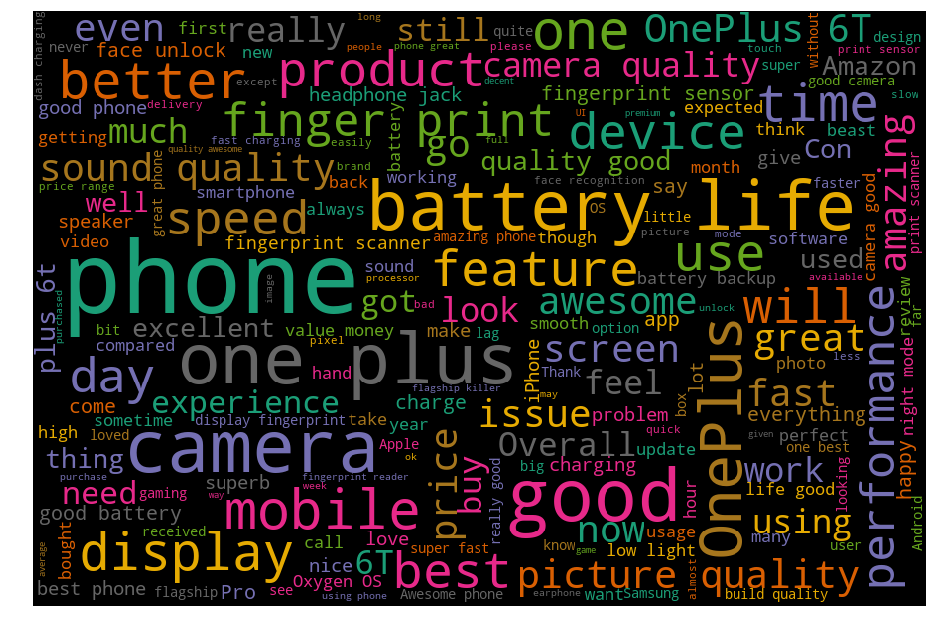

In [92]:
#displaying the buzz words from the review text rows which have positive polarity- OnePlus 6T
pos = ' '.join([text for text in df1['Review_Text'][df1.sentiment_polarity == 'positive']])
#calling wordcloud function
WC(pos)

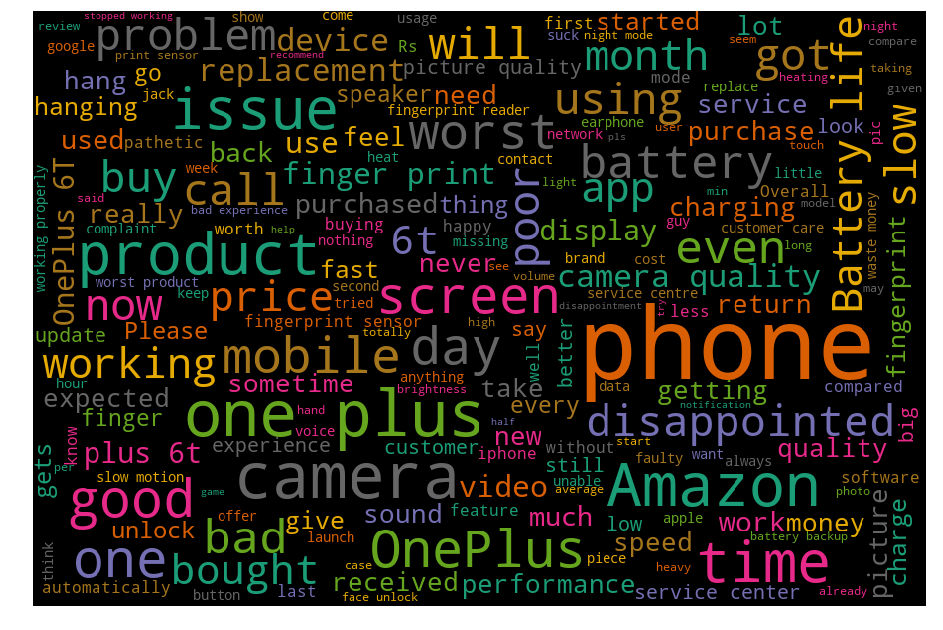

In [88]:
#displaying the buzz words from the review text rows which have negative polarity- OnePlus 6T
neg = ' '.join([text for text in df1['Review_Text'][df1.sentiment_polarity == 'negative']])
WC(neg)

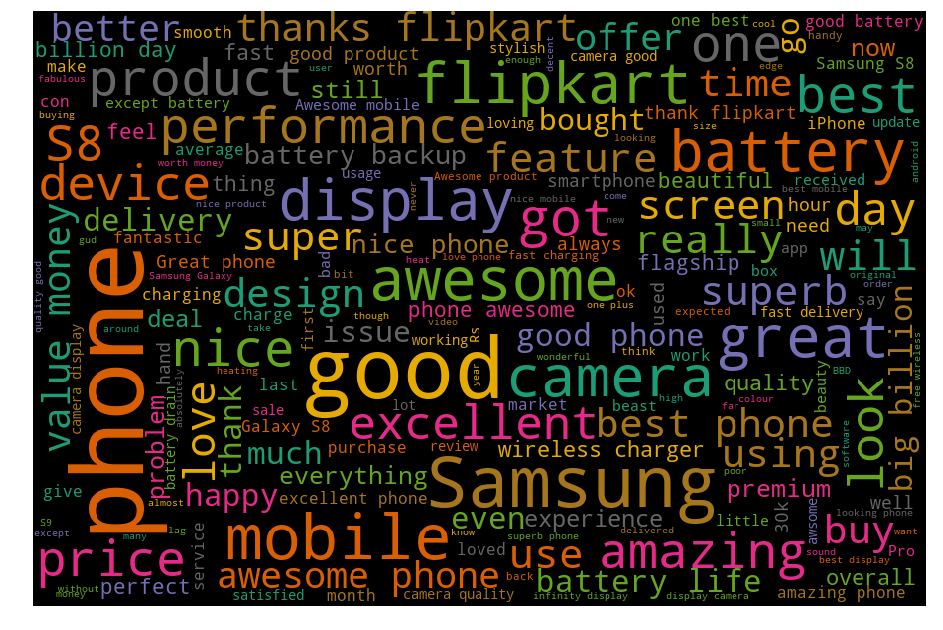

In [93]:
#displaying the buzz words from the review text rows which have positive polarity- Samsung Galaxy S8
pos = ' '.join([text for text in df['Review_Text'][df.sentiment_polarity == 'positive']])
#calling wordcloud function
WC(pos)

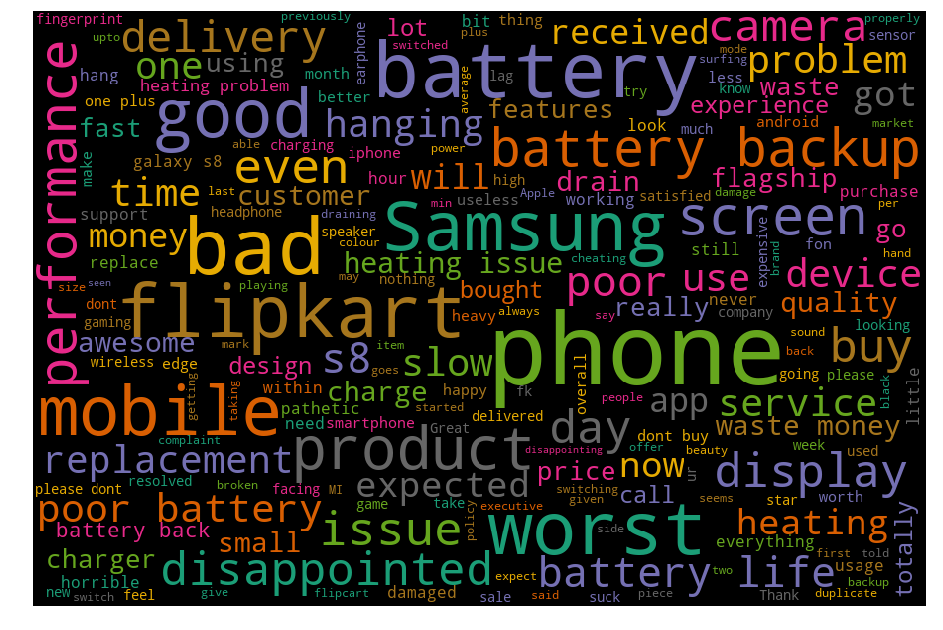

In [94]:
#displaying the buzz words from the review text rows which have negative polarity- Samsung Galaxy S8
neg = ' '.join([text for text in df['Review_Text'][df.sentiment_polarity == 'negative']])
WC(neg)